In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
data = pd.read_csv("CC GENERAL.csv")
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [123]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [124]:
data = data.drop("CUST_ID", axis = 1)

In [125]:
cred_lim_med = data["CREDIT_LIMIT"].median()
data["CREDIT_LIMIT"] = data["CREDIT_LIMIT"].fillna(cred_lim_med)


In [126]:
min_pay_med = data["MINIMUM_PAYMENTS"].median()
data["MINIMUM_PAYMENTS"] = data["MINIMUM_PAYMENTS"].fillna(min_pay_med)


In [127]:
data = np.log(data +1)

array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>],
       [<Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>],
       [<Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes: title={'center': 'TENURE'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

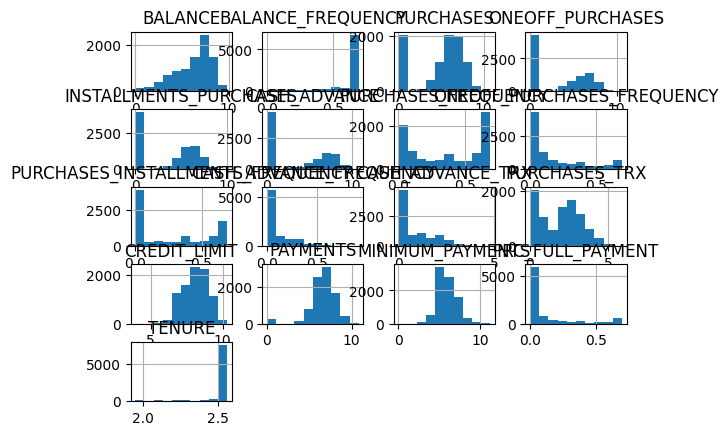

In [128]:
data.hist()

In [129]:
from sklearn.preprocessing import StandardScaler

In [130]:
scl = StandardScaler()
data_sc = data
data_sc = pd.DataFrame(scl.fit_transform(data_sc), columns= data_sc.columns, index= data_sc.index)
data = data_sc

In [131]:
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.205218,-0.148757,-0.113532,-0.987090,0.394480,-0.930733,-0.746901,-0.732480,-0.674253,-0.724360,-0.810069,-0.579510,-1.447163,-0.824484,-0.829841,-0.556368,0.347262
1,0.948918,0.179616,-1.679855,-0.987090,-1.087454,1.528788,-1.302799,-0.732480,-0.958256,0.699592,0.784603,-1.379210,0.926060,1.065033,0.908184,0.391958,0.347262
2,0.824993,0.492710,0.600727,1.062022,-1.087454,-0.930733,1.196820,2.466762,-0.958256,-0.724360,-0.810069,0.487865,1.010229,-0.119300,0.450407,-0.556368,0.347262
3,0.624653,-0.857867,0.827499,1.265778,-1.087454,0.564372,-1.014151,-0.363042,-0.958256,-0.213583,-0.123281,-0.874655,1.010229,-4.161996,-0.144271,-0.556368,0.347262
4,0.271260,0.492710,-0.708481,-0.114307,-1.087454,-0.930733,-1.014151,-0.363042,-0.958256,-0.724360,-0.810069,-0.874655,-1.224909,-0.064979,-0.351833,-0.556368,0.347262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-1.379634,0.492710,0.266574,-0.987090,0.754107,-0.930733,1.196820,-0.732480,1.192408,-0.724360,-0.810069,0.037255,-1.447163,-0.525121,-1.715012,1.359774,-4.401425
8946,-1.568051,0.492710,0.276841,-0.987090,0.763821,-0.930733,1.196820,-0.732480,1.192408,-0.724360,-0.810069,0.037255,-1.447163,-0.628912,-0.144271,-0.556368,-4.401425
8947,-1.473834,-0.092906,0.027374,-0.987090,0.527794,-0.930733,0.883040,-0.732480,0.854234,-0.724360,-0.810069,-0.074955,-1.447163,-1.391318,-1.275542,0.498161,-4.401425
8948,-1.733775,-0.092906,-1.679855,-0.987090,-1.087454,0.086038,-1.302799,-0.732480,-0.958256,0.259328,0.278464,-1.379210,-2.291676,-1.661097,-1.604737,0.498161,-4.401425


In [132]:
from sklearn.cluster import KMeans

<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

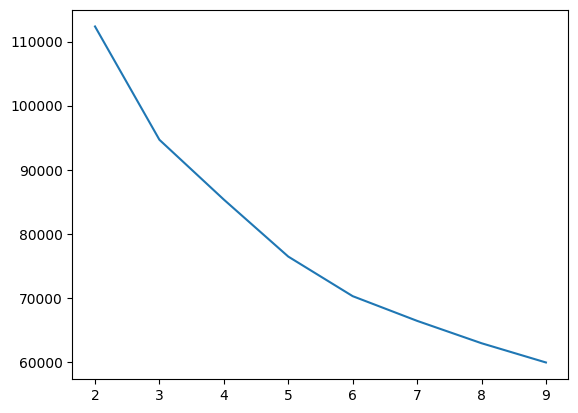

In [133]:
lst = []
k = range(2, 10)
for i in k:
    model = KMeans(n_clusters= i, init="random", n_init = 10)
    model.fit(data)
    lst.append(abs(model.score(data)))
plt.plot(k, lst)
plt.grid

In [134]:
model = KMeans(n_clusters= 3, init="random", n_init = 10)
y = model.fit_predict(data)
y

array([2, 1, 0, ..., 2, 1, 2], shape=(8950,), dtype=int32)

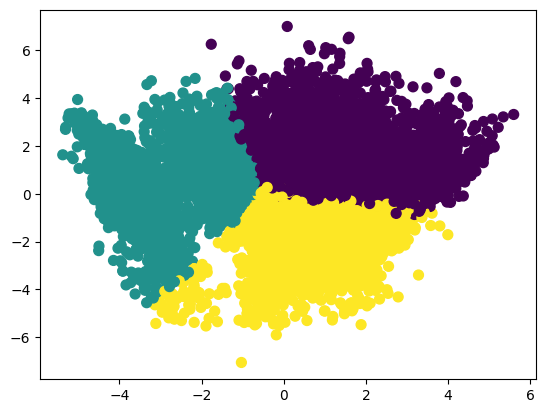

In [135]:
plt.scatter(data_new[:, 0], data_new[:, 1], c=y, s=50, cmap='viridis');

In [136]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

In [137]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_new = pca.fit_transform(data)

In [138]:
model = AgglomerativeClustering(n_clusters=3,linkage="complete",  distance_threshold=None)
p = model.fit_predict(data)
p

array([1, 0, 2, ..., 1, 1, 0], shape=(8950,))

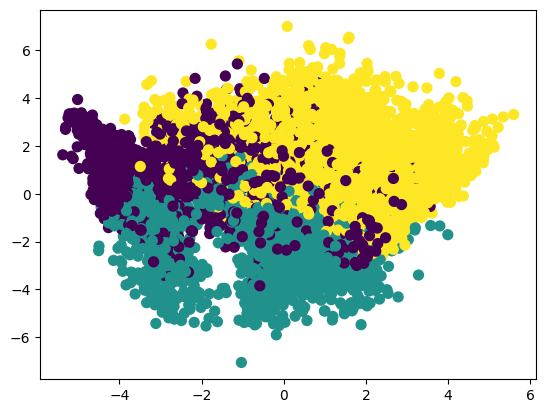

In [139]:
plt.scatter(data_new[:, 0], data_new[:, 1], c=p, s=50, cmap='viridis');

In [140]:
gmm = GaussianMixture(n_components=3)
gmm.fit(data)
preds_gmm = gmm.predict(data)

In [141]:
preds_gmm

array([0, 1, 1, ..., 0, 1, 1], shape=(8950,))

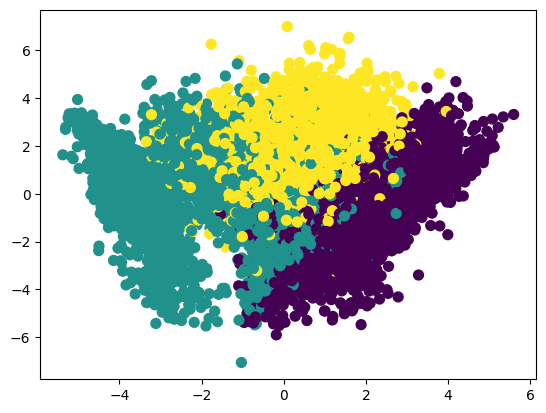

In [142]:
plt.scatter(data_new[:, 0], data_new[:, 1], c=preds_gmm, s=50, cmap='viridis');

In [143]:
model_db = DBSCAN(eps = 0.9, min_samples=3)
pred_db = model_db.fit_predict(data)
pred_db

array([  2,   0,   1, ..., 134,  -1,  -1], shape=(8950,))

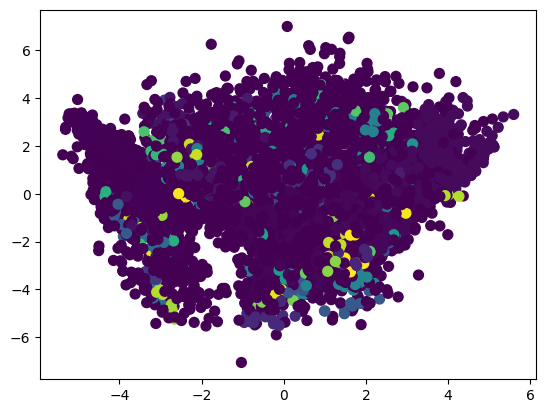

In [144]:
plt.scatter(data_new[:, 0], data_new[:, 1], c=pred_db, s=50, cmap='viridis');